In [ ]:
import torch 
from src_v2.distill_datasets import LmdbDataset
from src_v2.distill_datasets import CombinedDataset, CombinedDatasetTrain, CombinedDatasetVal, LmdbDataset
from fairchem.core.common.registry import registry
from fairchem.core.datasets.ase_datasets import AseDBDataset
import numpy as np
from tqdm import tqdm
from torch.utils.data import Subset
import matplotlib.pyplot as plt
from tqdm import tqdm

/home/ishan-amin/miniconda3/envs/fairchemV2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
a2g_args = {  
    # "molecule_cell_size": 120.0,
    "r_energy": True,
    "r_forces": True,
}
# teacher_labels_folder = '/data/ishan-amin/hessian_proj_data/labels/SPICE_labels/mace_off_large_SpiceAminos/force_jacobians'
# teacher_labels_folder =  '/data/ishan-amin/hessian_proj_data/labels/md22_labels/jmp-large_buckyball-catcher/force_jacobians'
# teacher_labels_folder = '/data/ishan-amin/OMOL/TOY/labels/ligand_pocket_300/force_jacobians'
teacher_labels_folder = '/data/ishan-amin/OMOL/4M/subsets/ligand_pocket/force_jacobians'

dataset = LmdbDataset(teacher_labels_folder)

print(f"DATASET LEN: {len(dataset)}")
res = 0
for i in tqdm(range(len(dataset))):
    hessian = dataset[i]
    num_atoms = int(np.sqrt(hessian.shape[0] / 9))
    hessian = hessian.reshape(num_atoms, 3, num_atoms, 3)
    rel_err_assym = (hessian - hessian.permute(2,3,0,1)).abs().mean() / hessian.abs().mean()
    res = res * (i / (i + 1)) + (rel_err_assym / (i + 1))
print(f"Relative error: {(res * 100):.2f} %")

Total entries across all LMDB files jacs: 20137
DATASET LEN: 20137


100%|██████████| 20137/20137 [00:16<00:00, 1258.39it/s]


Relative error: 5.57 %


In [ ]:
folder2 = teacher_labels_folder = '/data/ishan-amin/OMOL/4M/subsets/ligand_pocket/force_jacobians'
dataset2 = LmdbDataset(teacher_labels_folder)
res = 0
for i in range(len(dataset)):
    hessian = dataset[i]
    hessian2 = dataset2[i]
    rel_err = ((hessian - hessian2)).abs().mean() / hessian.abs().mean()
    res = res * (i / (i + 1)) + (rel_err / (i + 1))
print(f"Relative error: {(res * 100):.8f} %")

Total entries across all LMDB files jacs: 300
Relative error: 0.06341682 %


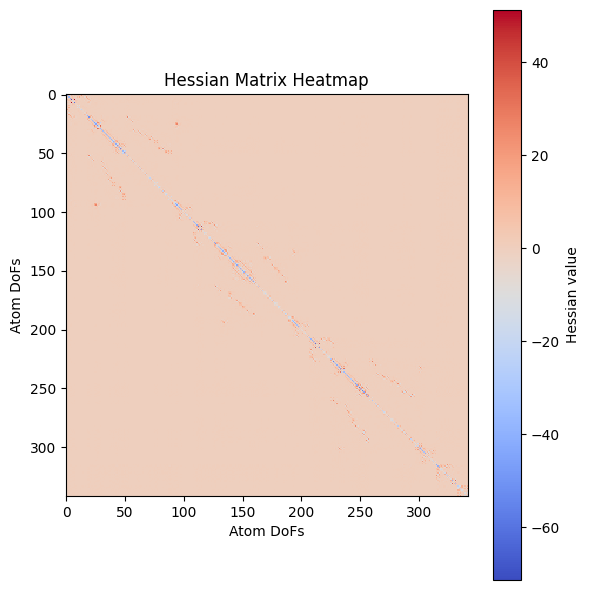

In [20]:
i = 71
hessian = dataset[i]
num_atoms = int(np.sqrt(hessian.shape[0] / 9))
hessian = hessian.reshape(num_atoms * 3, num_atoms * 3)
# Plot heatmap


# Plot heatmap
plt.figure(figsize=(6, 6))
plt.imshow(hessian, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Hessian value')
plt.title('Hessian Matrix Heatmap')
plt.xlabel('Atom DoFs')
plt.ylabel('Atom DoFs')
plt.tight_layout()
plt.show()


In [14]:
teacher_labels_folder2 = '/data/ishan-amin/OMOL/TOY/labels/ligand_pocket_300/FINAL/force_jacobians'
dataset2 = LmdbDataset(teacher_labels_folder2)
print(f"DATASET LEN: {len(dataset)}")
res = 0
for i in range(len(dataset)):
    hessian_f = dataset[i]
    hessian2_f = dataset2[i]
    num_atoms = int(np.sqrt(hessian_f.shape[0] / 9))
    hessian = hessian_f.reshape(num_atoms, 3, num_atoms, 3)
    rel_err_dataset = (hessian_f - hessian2_f).abs().mean() / hessian_f.abs().mean()
    res = res * (i / (i + 1)) + (rel_err_dataset / (i + 1))
print(f"Relative error between datasets: {(res * 100):.2f} %")

Total entries across all LMDB files jacs: 300
DATASET LEN: 300
Relative error between datasets: 0.06 %


In [ ]:
teacher_forces_folder = '/data/ishan-amin/OMOL/TOY/labels/ligand_pocket_300/V2/val_forces'
dataset2 = LmdbDataset(tebacher_labels_folder2)

In [4]:
a2g_args = {  
    # "molecule_cell_size": 120.0,
    "r_energy": True,
    "r_forces": True,
}
path = '/data/ishan-amin/OMOL/TOY/ligand_pocket_300/val'
dataset = AseDBDataset({
                        "src": path,
                        "a2g_args": a2g_args,
                        })
print(len(dataset))

300
